In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [7]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [8]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

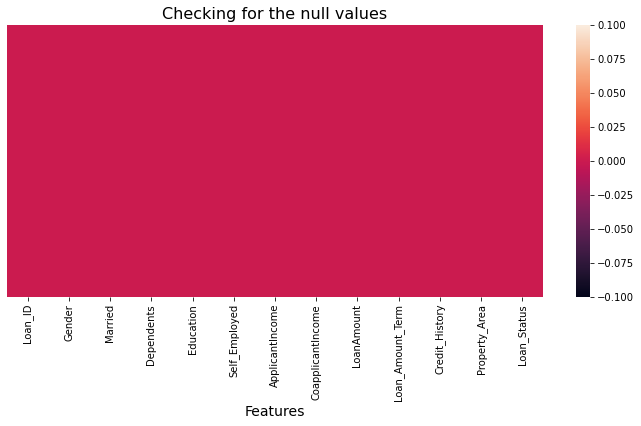

In [9]:
#visualization of NaN values
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('Checking for the null values', size=16)
plt.xlabel('Features', size=14)
plt.show()

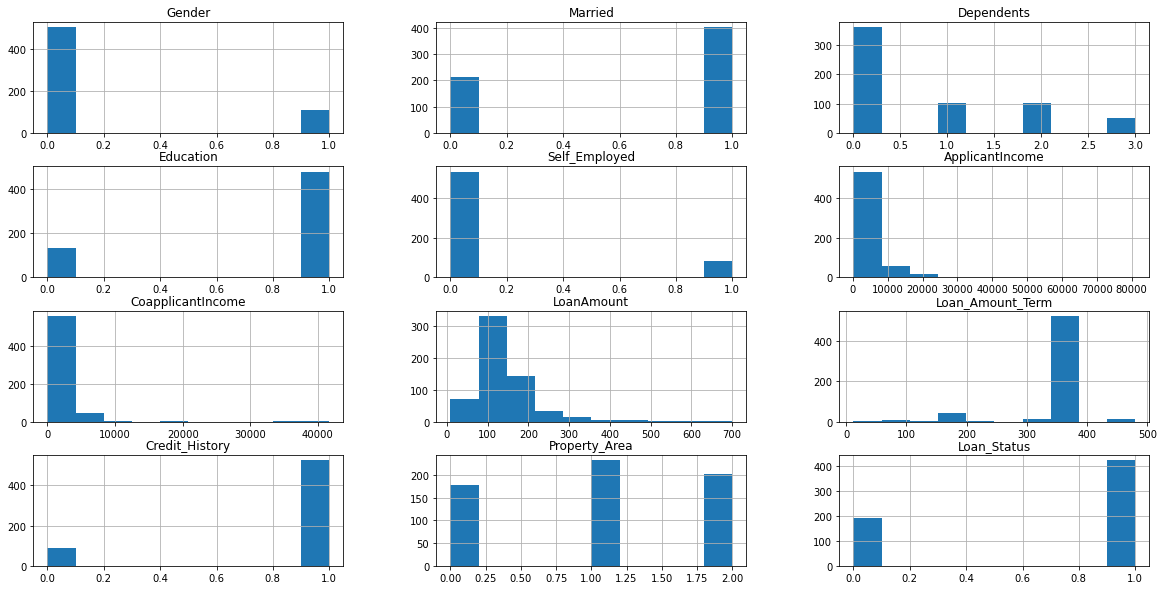

In [10]:
#visualization of distribution of whole data in histogram
data.hist(figsize=(20, 10))
plt.show()

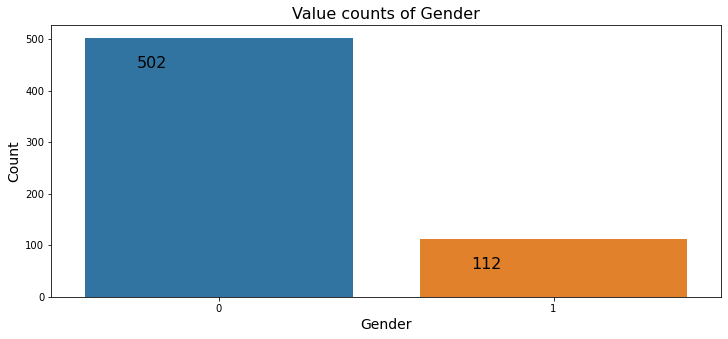

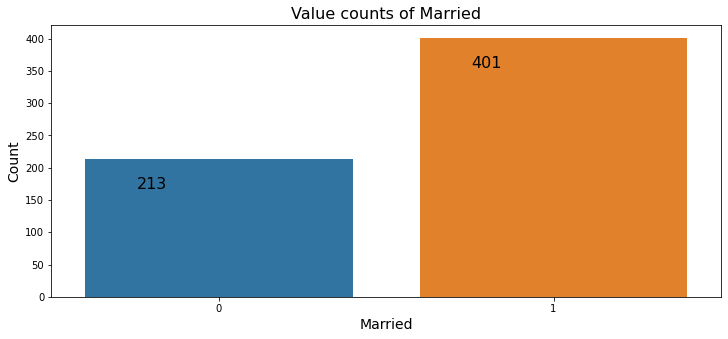

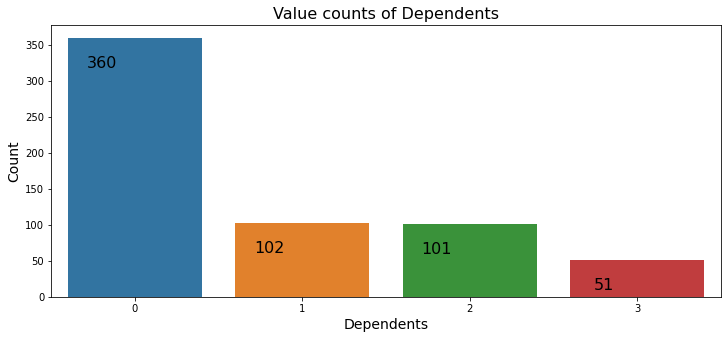

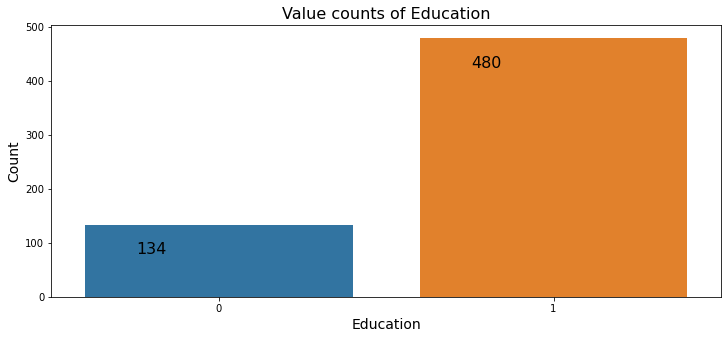

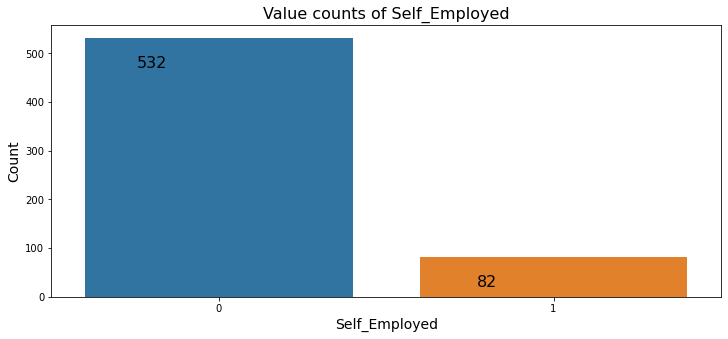

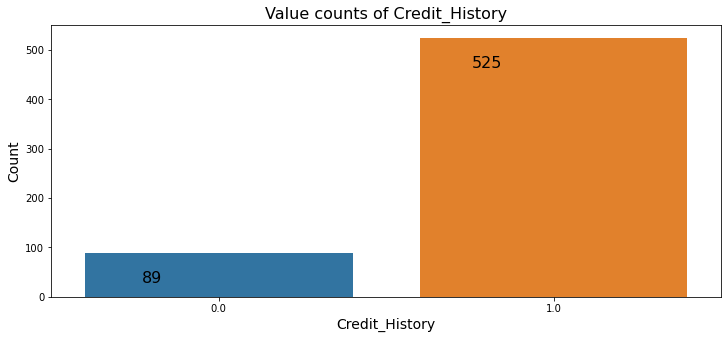

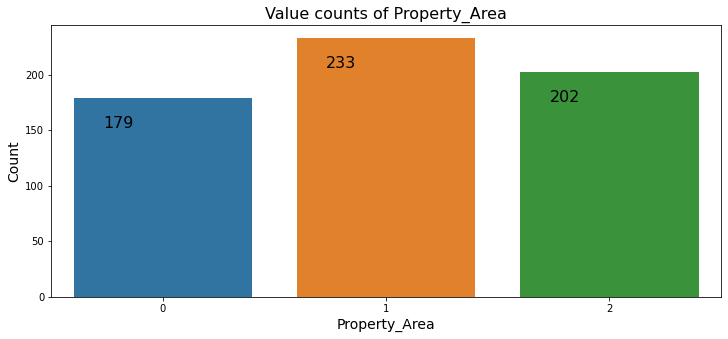

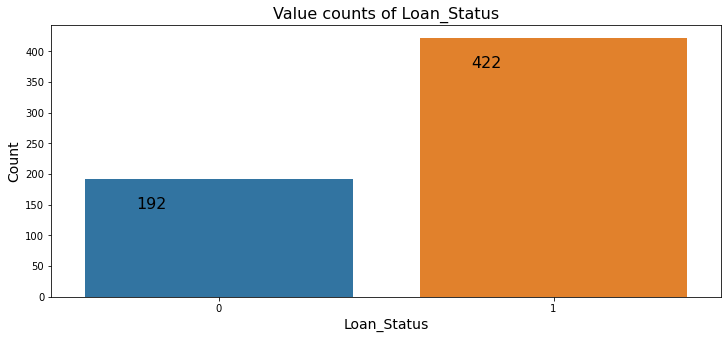

In [11]:
parameters = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
              'Credit_History', 'Property_Area', 'Loan_Status']

#visualization of the value counts
for col in parameters:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    ch = sns.countplot(x=col, data=data, ax=ax)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.title(f"Value counts of {col}", size=16)
    for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
    plt.show()

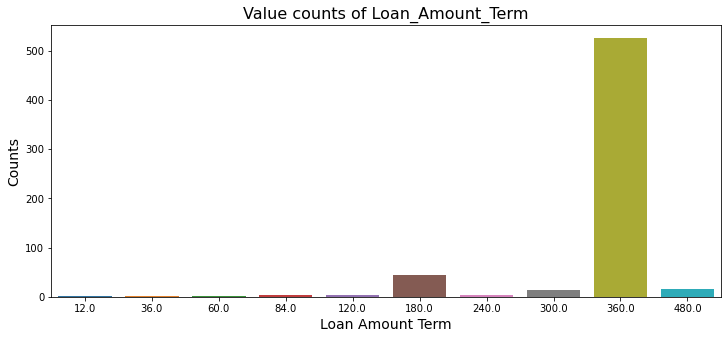

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data['Loan_Amount_Term'])
plt.xlabel('Loan Amount Term', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Loan_Amount_Term', size=16)
plt.show()

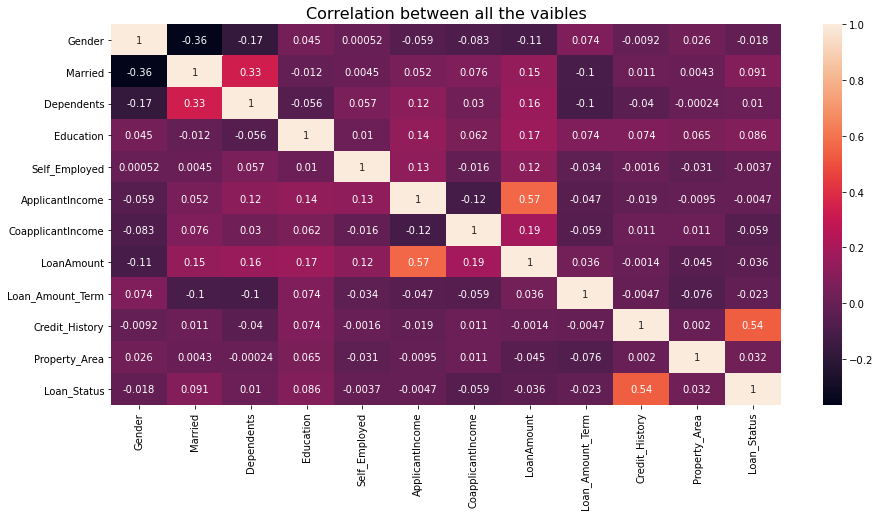

In [13]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [14]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [15]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = data['Loan_Status'], random_state=10)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [20]:
input_layers = X_train.shape[1]
output_layers = 1
number_of_hidden_layers = 2
neuron_hidden_layer1 = 10
neuron_hidden_layer2 = 5

In [21]:
model = Sequential()
model.add(InputLayer(input_shape=(input_layers,)))
model.add(Dense(units=neuron_hidden_layer1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer2, activation='relu'))
model.add(Dense(units=output_layers, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 23ms/step - loss: 0.7953 - accuracy: 0.3157 - val_loss: 0.7504 - val_accuracy: 0.3252
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7623 - accuracy: 0.3238 - val_loss: 0.7255 - val_accuracy: 0.3415
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.3401 - val_loss: 0.7090 - val_accuracy: 0.3577
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.3625 - val_loss: 0.6962 - val_accuracy: 0.3821
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.4196 - val_loss: 0.6862 - val_accuracy: 0.5041
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5092 - val_loss: 0.6785 - val_accuracy: 0.6179
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6049 - val_loss: 0.6722 - val_accuracy: 0.6748
Epoch 8/50
16/16 [=

In [25]:
pred_test = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
accuracy_score(y_test, pred_test)

0.8130081300813008

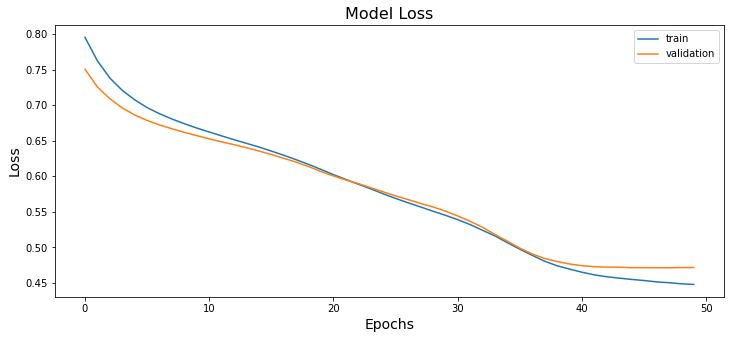

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='validation')
plt.title('Model Loss', size=16)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

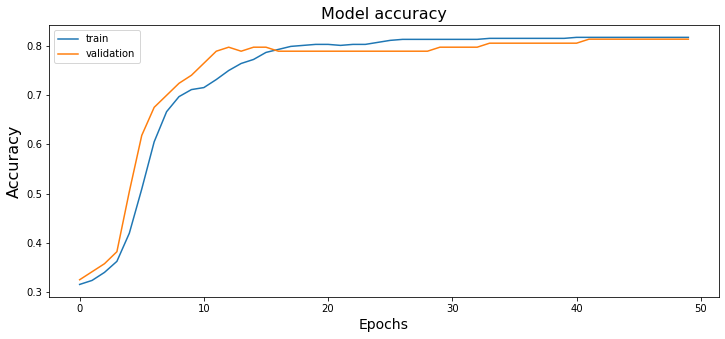

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='validation')
plt.title('Model accuracy', size=16)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy', size=16)
plt.legend()
plt.show()